In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
from PIL import Image
from os.path import join
import os
import time
import csv

In [2]:
#path="/home/ubuntu/tess_train_data_prep/text_csv/tamil/good_tamil.csv"

path = '/home/ubuntu/tess_train_data_prep/reports/telugu/training_data/training_telugu_data_reports_v1_google_lines/training_data_json/crops/error_lines.csv'
crops_path ='/home/ubuntu/tess_train_data_prep/reports/telugu/training_data/training_telugu_data_reports_v1_google_lines/training_data_json/crops/error_crops/'
report_file = '/home/ubuntu/tess_train_data_prep/reports/telugu/training_data/training_telugu_data_reports_v1_google_lines/training_data_json/crops/te_train_curated_data_lines_17501_to_25000.csv'

In [3]:
def append_to_report(r_file, error_p):
    with open(r_file, 'a') as f:
        writer = csv.writer(f)
        writer.writerow(error_p)
        
        
def generate(i):
    img = cv2.imread(join(crops_path,df['crop_name'][i]))
    #print(img)
    key = df['crop_name'][i]
    #print(df['g_conf'][i])
    print_diff_loc(str(df["tess_text"][i])[1:] ,str(df["gt_text"][i]))
    print(df['mismatch_count'][i])
    #pyperclip.copy(str(df["gt_text"][i]))
    print(df['score'][i])

    return df['score'][i],img,key,"TESS  =>"+str(df["tess_text"][i]),"GROUND=> "+str(edit_google(df["gt_text"][i]))


def print_diff_loc(str1,str2):
    str1 = str1.replace(' ','')
    str2 = str2.replace(' ','')
    if len(str1) > len(str2):
        iter_string = str2
    else :
        iter_string = str1
    break_index = 0
    for loc in range(len(iter_string)):
        break_index += 1
        if str1[loc] != str2[loc]:
            break
             
    print("\x1b[31m\"{}\"\x1b[0m".format(iter_string[:break_index]))
    
def edit_google(s):
    s1=s
    try:
        i=0
        while(i<len(s)):
            s1=s
            if s[i] in ["/","।",'।' ,':','|',"," ,'०',"]","-",")","}"] and s[i-1]==" ":    
                s=s[:i-1]+s[i:]
                if i > 0 :
                    if s[i-1] in ["-","[","{","/","("] and s[i]==" ":
                        s=s[:i]+s[i+1:]
            elif s[i] in ["-","[","{","/","("] and s[i+1]==" ":
                s=s[:i+1]+s[i+2:]
            i=i+1
        #print(s)
    except:
        print("ERROR IN GOOGLE CORRECTION")
        return s1
    return s
    

In [4]:
def init_file():
    if not os.path.exists(report_file):
        columns = ['key','error_type','groundTruth']
        text = ','.join(columns) + '\n'
        with open(report_file, "a") as txtfile:
            txtfile.write(text)

In [5]:
df = pd.read_csv(path)

In [6]:
df.head()

,Unnamed: 0,Unnamed: 0.1,gt_text,tess_text,score,gt_lenght,mismatch_count,exp,coord,image_name,crop_name,ocr_conf
0,0,26033,తరంగదైర్ఘ్యంపై ఆధారపడుతుందని చెప్పవచ్చు . తెల్...,తరంగదైర్హ్యంపై ఆధారపడుతుందని చెప్పవచ్చు. తెల్...,0.951613,62,3,GOOGLE_OCR_15_TELUGU_Telugu,"{'boundingBox': {'vertices': [{'x': 663, 'y': ...",10th class physics_14_962d63ff-86d9-402b-ac2c-...,403aeca8-06e9-46f0-ab78-598843e7728d.png,"{'text': ['తరంగదైర్హ్యంపై', 'ఆధారపడుతుందని', '..."
1,1,12558,అభివృద్ధికి ఎంతగానో తోడ్పడిండి . దురదృష్టవశాత్...,అభివృద్ధికి ఎంతగానో తోడ్పడిండి. దురదృష్టవశాత్...,0.980392,102,2,GOOGLE_OCR_15_TELUGU_Telugu,"{'boundingBox': {'vertices': [{'x': 440, 'y': ...",10th class physics_222_962d63ff-86d9-402b-ac2c...,c6d09ce6-dd7f-4488-857e-ff6fbae5a65e.png,"{'text': ['అభివృద్ధికి', 'ఎంతగానో', 'తోడ్పడిండ..."
2,2,24105,],.],0.000000,1,1,GOOGLE_OCR_15_TELUGU_Telugu,"{'boundingBox': {'vertices': [{'x': 574, 'y': ...",COI_2_214_958aeba8-c53c-4b42-8c69-071f307c6863,eea55918-fdbe-4a74-a461-80523de4c167.png,"{'text': ['.]'], 'conf': [63]}"
3,3,38015,7.0 + 39.0 = - 23.0 2,7.0 + 39.0 A = 230,0.733333,15,4,GOOGLE_OCR_15_TELUGU_Telugu,"{'boundingBox': {'vertices': [{'x': 1487, 'y':...",10th_Physics_Telugu_opt_192_181d5755-c19b-4d95...,50282ea7-39d7-4c86-8dc7-7eaa6bc755b0.png,"{'text': ['7.0', '+', '39.0', 'A', '=', '230']..."
4,4,22602,2p,2D.,0.000000,2,2,GOOGLE_OCR_15_TELUGU_Telugu,"{'boundingBox': {'vertices': [{'x': 912, 'y': ...",10th class physics_184_962d63ff-86d9-402b-ac2c...,a7413575-7597-4f6e-a075-933ba7da2bcf.png,"{'text': ['2D.'], 'conf': [56]}"


In [7]:
init_file()

17503
"కేంద్రప్రత్యక్షపన్నులబోర్డు”"
1
0.9830508474576272
7e007049-a728-4566-b819-f1d71b8acd45.png


<Figure size 432x288 with 0 Axes>

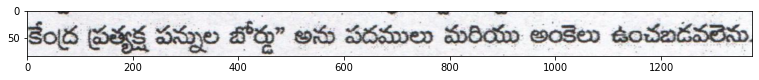

TESS  => కేంద్ర ప్రత్యక్ష పన్నుల బోర్డు” అను పదములు మరియు అంకెలు ఉంచబడవలెను.
GROUND=> కేంద్ర ప్రత్యక్ష పన్నుల బోర్డు " అను పదములు మరియు అంకెలు ఉంచబడవలెను .
0.9830508474576272


KeyboardInterrupt: Interrupted by user

In [8]:
for i in range(17501,25000):
    #try :
    print(i)
    plt.figure(figsize=(13,3))
    scoreees,p,key,tess,ground=generate(i)
    #if scoreees <= 0:
    print(key)
    #plt.axis('off')
    plt.imshow(np.array(p))
    plt.show()
    print(tess)
    print(ground)
    print(scoreees)
    #
    check = input()
#     while check == '':
#         print("Please enter some input")
#         check = input()
    if check == '':
        append_to_report(report_file,[key,check,ground[8:]])
#     if check == '-4':
#         append_to_report(report_file,[key,check,ground[8:]])

    if check not in ['s','S','','8']:
        if check not in ['w','W']:
            if check == '-1':
                append_to_report(report_file,[key,check,tess[8:]])
            else:
                append_to_report(report_file,[key,check,ground[8:]])
        else :
            print("Type of error in tesseract")
            check = input()

            if check != '-1':
                print("Enter the corrected text")
                corrcted_ground = input()
            else:
                corrcted_ground = tess[8:]


            append_to_report(report_file,[key,check,corrcted_ground])
    plt.clf()
#     except Exception as e:
#         print('Error in processing {} due to {}'.format(key,e))
    clear_output(wait = True)

####tamil error class  
'''
class -3 :  google vision is correct
Class -2 : Manual intervention required 
class -1 : tesseract correct
class 0 : charater mismatch
Class 1 : 2 as 2.0, 1.40 as 1.0, 14 as 1, etc.  ( digit error)
Class 2 : மற்றும் as மற்றும, சேரி as சேர, etc.  (Auxiliaries)
Class 3 : / as |, " as ' ', etc        (Special characters)
Class 4 : கிடங்கு as யபI, கடனாக as -IபI, etc. (contradiction)
Class 5 : கடலுர் as             (Missing text)
Class 6 : Text repeatation

'''


####kannada error class  




'''
Class -2 : Manual intervention required 
class -1 : tesseract correct
class 0 : charater mismatch ಕೆ as ಕ
Class 1 : ೧೧ . as NAN, ೧೧ . as 1, 2 as 2.0, 1.40 as 1.0, 14 as 1, etc.  ( digit error)
Class 2 : ಚಿಹ್ನೆಗಳು as ಚಿಹೆಗಳು,  ಬಾಗಲಕೋಟ as ಬದಾಗಲಕೋಟ, ಎಲ್ಎಕೂ as ಎಲ್‌ಎಕ್ಯೂ etc.  (Auxiliaries)
Class 3 : / as |, " as ' ', etc        (Special characters)
Class 4 : கிடங்கு as யபI, கடனாக as -IபI, etc. (contradiction)
Class 5 : ಅರ್ಜೆಂಟಿನಾ as             (Missing text and crop issue)
Class 6 : Text repeatation

'''

####Bengali error class  
    
'''
Class -2 : Manual intervention required 
class -1 : tesseract correct
class 0 : charater mismatch ಕೆ as ಕ
Class 1 : ২ as NAN, ২ as 2, 2 as 2.0, 1.40 as 1.0, 14 as 1, etc.  ( digit error) 

০, ১, ২, ৩, ৪, ৫, ৬, ৭, ৮, ৯ 

Class 2 : সংবিধানের as সৰ্ধাবধানের   etc.  (Auxiliaries)
Class 3 : / as |, " as ' ', etc        (Special characters)
#Class 4 : கிடங்கு as யபI, கடனாக as -IபI, etc. (contradiction)
Class 5 : সংবিধানের as             (Missing text)
Class 6 : Text repeatation

'''

'''
Line data curation:

1. Hit enter when google vision is true.

2. Use -1 when tesseract is correct.

3. Hit enter when both tesseract and google vision is true.

4. Use “w” when we can correct the ground truth using tesseract and google vision text.

5. Use -2 when we can’t correct the ground truth.

6. Use “s” when the image is not properly cropped(check matras,first word,last word),empty , too noisy,more than 2 lines and contain any diagram.

'''

In [18]:
df[df['crop_name']=='decffc0c-8542-4c97-83cb-1888341eb7f2.png']

,Unnamed: 0,gt_text,tess_text,score,gt_lenght,mismatch_count,exp,coord,image_name,crop_name,ocr_conf
20662,42497,50,0),0.0,2,2,tess_baseline_Devanagari,"{'boundingBox': {'vertices': [{'x': 2768, 'y':...",OutcomeBudgetH2021_2022_220_fd63650c-dbfa-409d...,decffc0c-8542-4c97-83cb-1888341eb7f2.png,"{'text': ['0)'], 'conf': [60]}"


In [ ]:
मेंमें